<h1><center> CNN </center>
   Find and classify Objects - CIFAR10 dataset</h1>

<h2>Problem Statement</h2>
<li>Train a deep learning model to find and classify objects in an image to its corresponding object class using Convolutional Neural Networks (CNN).
<li>Use the CIFAR10 dataset from tensorflow keras datasets.

<h2> Dataset Description</h2>
<li>The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


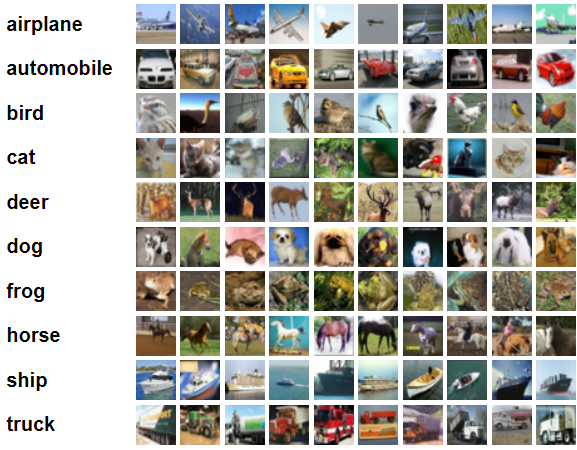

In [ ]:
from IPython.display import Image
Image(filename='/content/CIFAR10/cifar.png')

## <a id="1"> 1. Import Libraries & Dataset</a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
# load the dataset

(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape


170498071/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

There are 50000 training images and 10000 images for testing.

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2-D array. Lets convert it into 1-D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

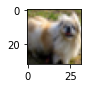

In [ ]:
plt.figure(figsize = (1,1))
plt.imshow(x_train[40])


<h2> Normalizing the training data</h2>
<li> Each image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255.
<li> So, normalize the values such that its values range between 0 and 1.
<li>To do this, we need to divide each value by 255.

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## <a id="2"> 2. Model Building - CNN</a>

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10

1563/1563 [==============================] - 75s 47ms/step - loss: 1.4681 - accuracy: 0.4716

Epoch 2/10

1563/1563 [==============================] - 72s 46ms/step - loss: 1.1192 - accuracy: 0.6077

Epoch 3/10

1563/1563 [==============================] - 73s 47ms/step - loss: 0.9816 - accuracy: 0.6568

Epoch 4/10

1563/1563 [==============================] - 73s 47ms/step - loss: 0.8958 - accuracy: 0.6887

Epoch 5/10

1563/1563 [==============================] - 73s 47ms/step - loss: 0.8270 - accuracy: 0.7110

Epoch 6/10

1563/1563 [==============================] - 74s 47ms/step - loss: 0.7691 - accuracy: 0.7319

Epoch 7/10

1563/1563 [==============================] - 73s 47ms/step - loss: 0.7137 - accuracy: 0.7517

Epoch 8/10

1563/1563 [==============================] - 74s 47ms/step - loss: 0.6660 - accuracy: 0.7667

Epoch 9/10

1563/1563 [==============================] - 77s 50ms/step - loss: 0.6213 - accuracy: 0.7829

Epoch 10/10

1563/1563 [======================

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 6s 19ms/step


array([[3.0872200e-03, 4.0892349e-04, 4.9012098e-03, 8.1293523e-01,
        6.6995808e-06, 1.6847895e-01, 2.8068831e-04, 2.4438984e-04,
        9.3763359e-03, 2.8044297e-04],
       [1.2394891e-03, 6.4444251e-04, 1.2503749e-07, 6.9774493e-09,
        6.4385574e-08, 3.3041009e-10, 3.5770598e-09, 1.2422899e-09,
        9.9807549e-01, 4.0367486e-05],
       [5.2683719e-02, 3.8889028e-02, 2.5364470e-03, 1.1286275e-03,
        8.4165815e-04, 1.3815070e-04, 1.9725451e-04, 3.1144443e-04,
        9.0000015e-01, 3.2734752e-03],
       [9.3917060e-01, 8.5194018e-03, 1.8802426e-03, 1.9436945e-03,
        1.2606937e-04, 1.2288651e-06, 4.9161099e-05, 4.0832114e-07,
        4.8259038e-02, 5.0193765e-05],
       [3.4167343e-08, 5.9774911e-06, 2.5662952e-03, 2.7023925e-02,
        9.1890389e-01, 6.0387049e-03, 4.5441952e-02, 3.0241820e-06,
        1.6127655e-05, 2.3267015e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1]

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [ ]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support



           0       0.69      0.81      0.75      1000

           1       0.83      0.81      0.82      1000

           2       0.66      0.55      0.60      1000

           3       0.58      0.46      0.51      1000

           4       0.62      0.72      0.67      1000

           5       0.62      0.60      0.61      1000

           6       0.78      0.76      0.77      1000

           7       0.73      0.77      0.75      1000

           8       0.78      0.81      0.80      1000

           9       0.78      0.79      0.78      1000



    accuracy                           0.71     10000

   macro avg       0.71      0.71      0.70     10000

weighted avg       0.71      0.71      0.70     10000




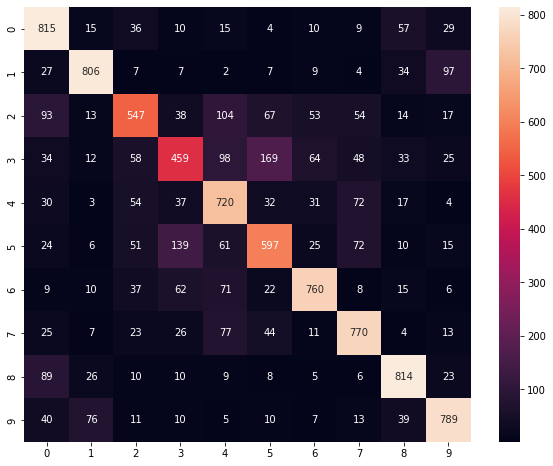

In [ ]:
# print out the confusion matrix
cm = confusion_matrix(y_test, y_classes)
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, fmt=".0f");